<a href="https://colab.research.google.com/github/SarveshThiru/CodeAlpha_Titanic_Classification/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Modules

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [29]:
train_df = pd.read_csv(r"train.csv")
test_df =pd.read_csv(r"test.csv")

## BASIC INSPECTIONS ON THE DATASET:


In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Displaying first 5 examples in test dataframe

In [31]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## checking for the information of the train dataset

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## checking for the information of the test dataset

In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Describing the train dataset

In [34]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Describing the test dataset

In [35]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Checking the datatypes of the Dataset

In [36]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Data Analysis:

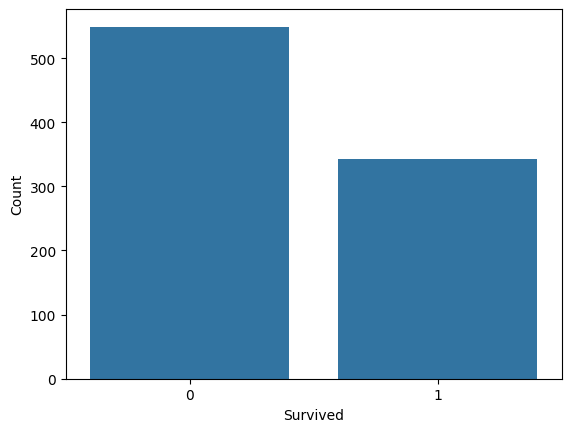

In [37]:
# categorial attributes:

sns.countplot(x='Survived', data=train_df)
plt.ylabel('Count')
plt.show()

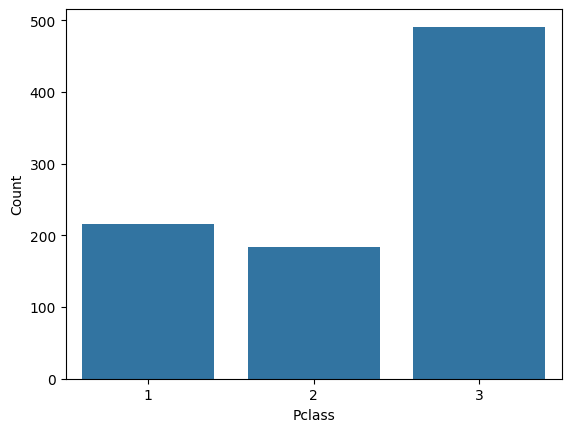

In [38]:
sns.countplot(x='Pclass', data=train_df)
plt.ylabel('Count')
plt.show()

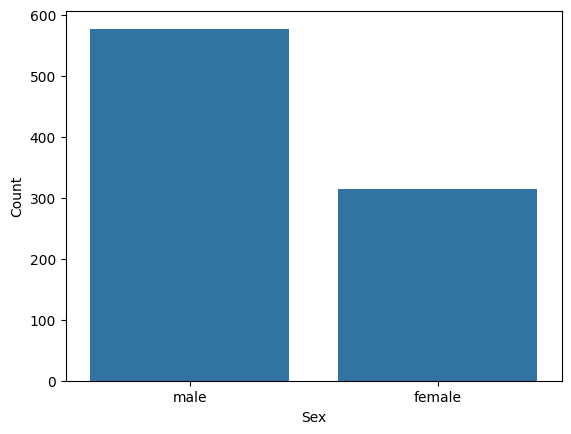

In [39]:
sns.countplot(x='Sex', data=train_df)
plt.ylabel('Count')
plt.show()

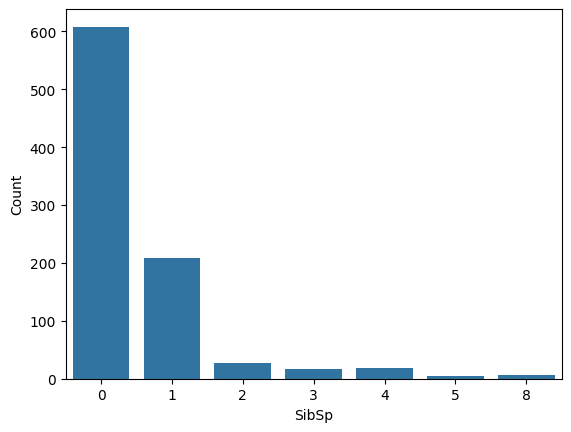

In [40]:
sns.countplot(x='SibSp', data=train_df)
plt.ylabel('Count')
plt.show()

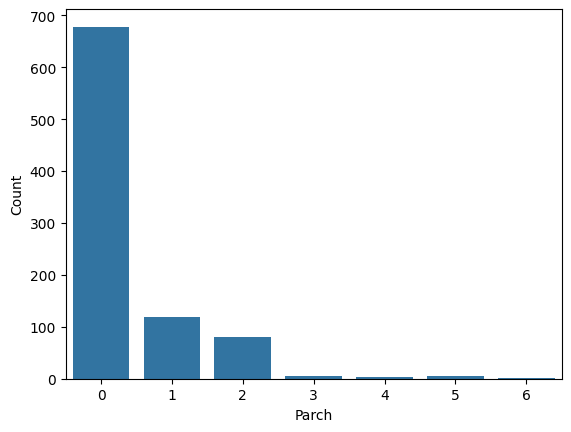

In [41]:
sns.countplot(x='Parch', data=train_df)
plt.ylabel('Count')
plt.show()

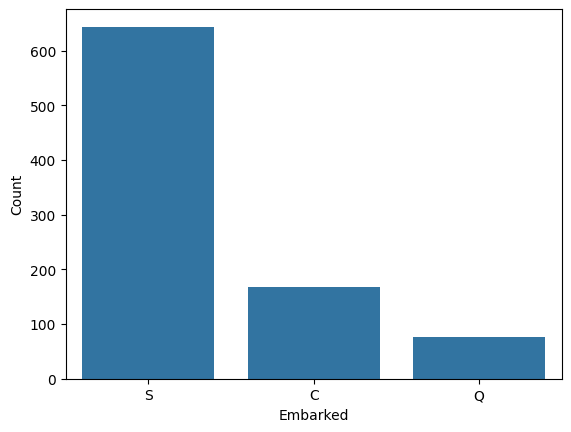

In [42]:
sns.countplot(x='Embarked', data=train_df)
plt.ylabel('Count')
plt.show()

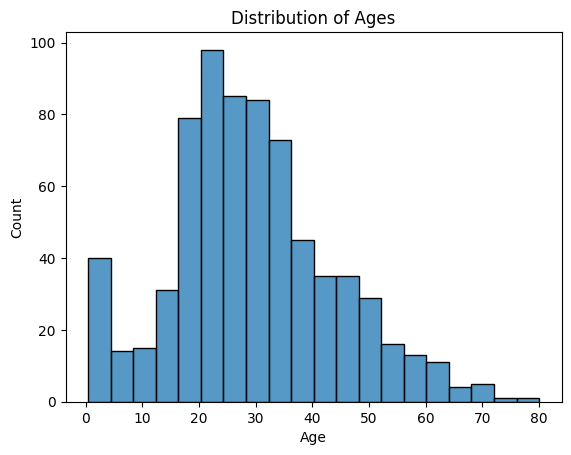

In [43]:
#Numerical Attributes:

sns.histplot(x='Age', data=train_df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

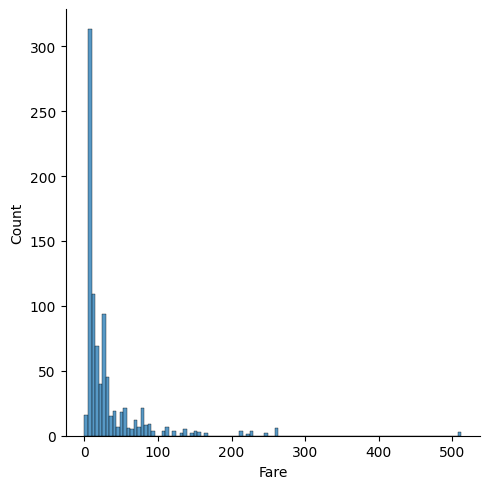

In [44]:
sns.displot(x='Fare', data=train_df)
plt.ylabel('Count')
plt.show()

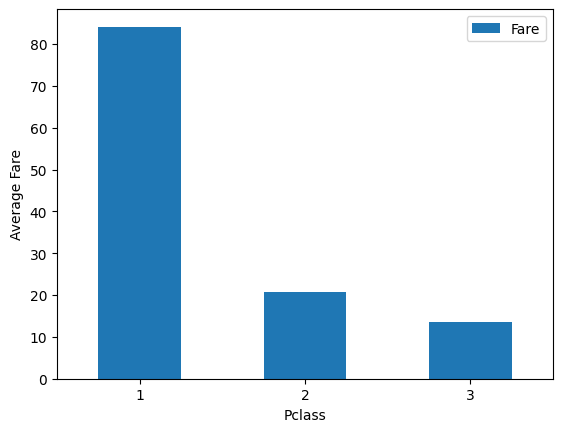

In [45]:
class_fare = train_df.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

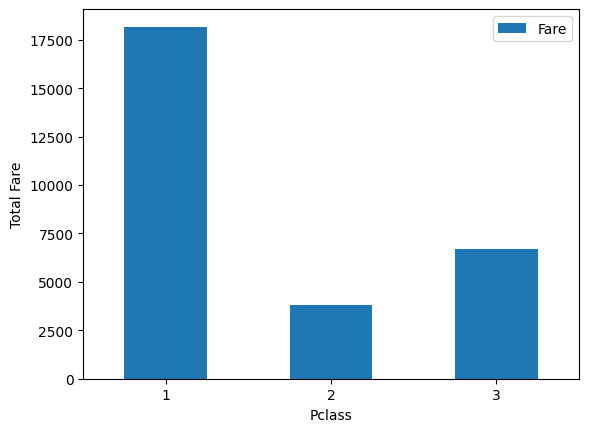

In [46]:
class_fare = train_df.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

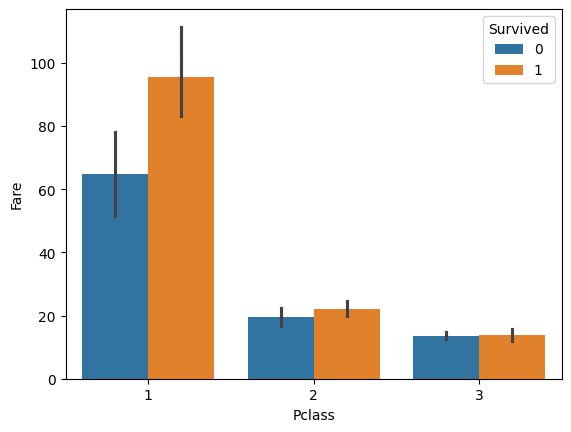

In [47]:
sns.barplot(data=train_df,x='Pclass',y='Fare',hue='Survived')
plt.show()

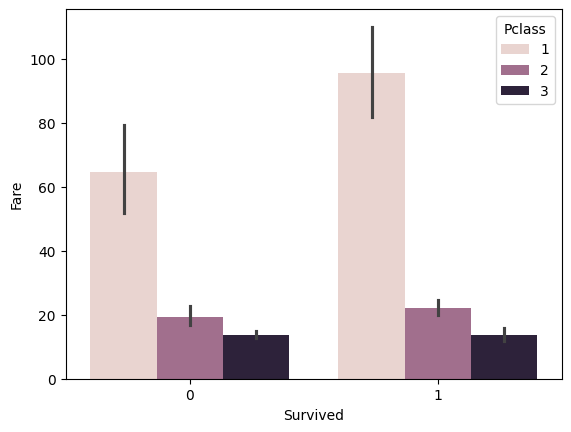

In [48]:
sns.barplot(data=train_df,x='Survived',y='Fare',hue='Pclass')
plt.show()

## Data PreProcessing

In [49]:
train_len=len(train_df)
df=pd.concat([train_df,test_df],axis=0)
df=df.reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Check for Null Values

In [50]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [51]:
df=df.drop(columns=['Cabin'],axis=1)

In [52]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [53]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## Filling missing values

In [54]:
df['Age'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304     NaN
1305    39.0
1306    38.5
1307     NaN
1308     NaN
Name: Age, Length: 1309, dtype: float64>

In [55]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [56]:
df['Embarked'].mode()[0]

'S'

In [57]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

## Log transformation for uniform data distribution:

<Axes: xlabel='Fare', ylabel='Density'>

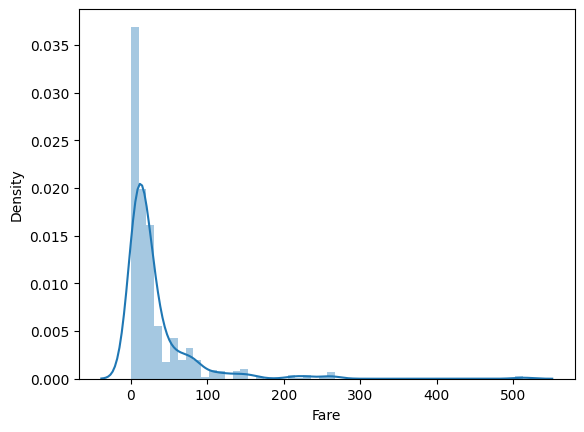

In [58]:
sns.distplot(train_df['Fare'])

In [59]:
train_df['Fare'] = np.log(train_df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

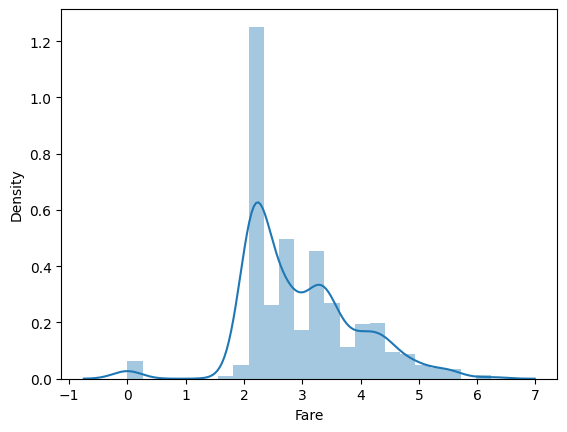

In [60]:
sns.distplot(train_df['Fare'])

## Correlation matrix

<Axes: >

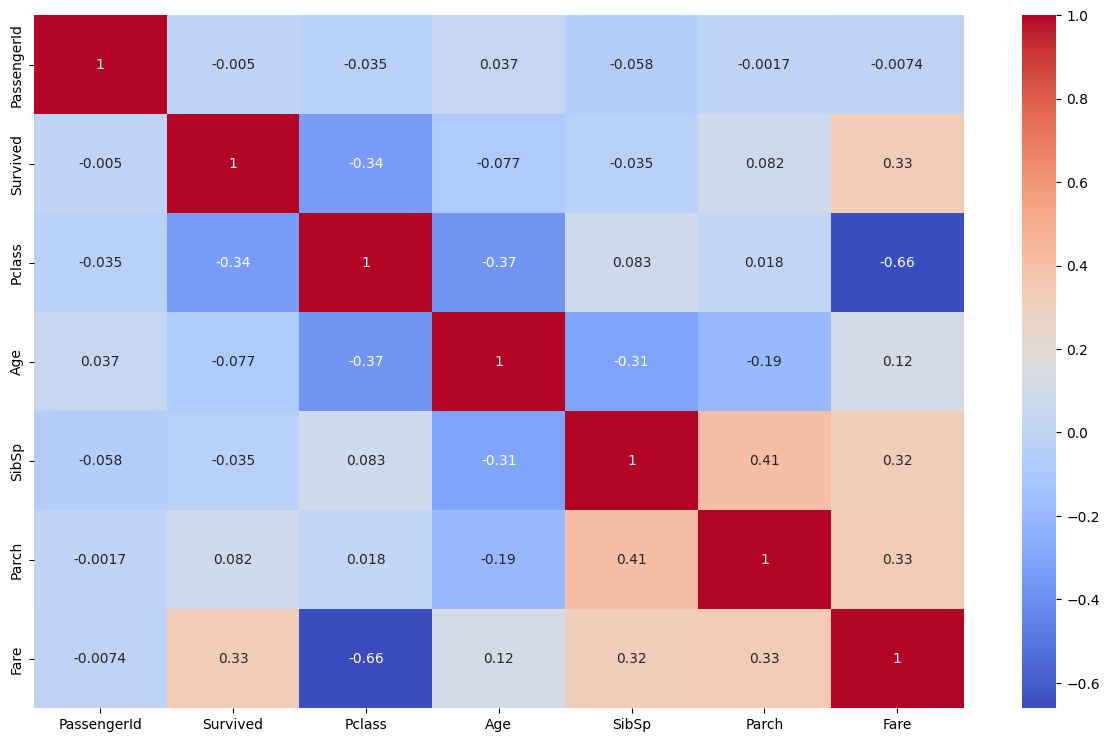

In [61]:
# Assuming 'Name' is a column containing strings, and you want to exclude it
numeric_columns = train_df.select_dtypes(include=[np.number]).columns
subset_df = train_df[numeric_columns]

# Now compute the correlation matrix
corr_matrix = subset_df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Drop Unnecessary Columns

In [63]:
df=df.drop(['Name','Ticket'],axis=1)

In [64]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.000000,1,0,7.2500,S
1,2,1.0,1,female,38.000000,1,0,71.2833,C
2,3,1.0,3,female,26.000000,0,0,7.9250,S
3,4,1.0,1,female,35.000000,1,0,53.1000,S
4,5,0.0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,29.881138,0,0,8.0500,S
1305,1306,NaN,1,female,39.000000,0,0,108.9000,C
1306,1307,NaN,3,male,38.500000,0,0,7.2500,S
1307,1308,NaN,3,male,29.881138,0,0,8.0500,S


In [65]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

## Spliting dataset

In [66]:
train=df.iloc[:train_len:]
test=df.iloc[train_len:,:]

In [67]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,22.0,1,0,7.2500,True,False,True
1,2,1.0,1,38.0,1,0,71.2833,False,False,False
2,3,1.0,3,26.0,0,0,7.9250,False,False,True
3,4,1.0,1,35.0,1,0,53.1000,False,False,True
4,5,0.0,3,35.0,0,0,8.0500,True,False,True


In [68]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
891,892,NaN,3,34.5,0,0,7.8292,True,True,False
892,893,NaN,3,47.0,1,0,7.0000,False,False,True
893,894,NaN,2,62.0,0,0,9.6875,True,True,False
894,895,NaN,3,27.0,0,0,8.6625,True,False,True
895,896,NaN,3,22.0,1,1,12.2875,False,False,True


## Train-Test Split

In [69]:
x=df.drop(columns=['PassengerId','Survived'],axis=1)
y=train['Survived']

In [70]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [71]:
x.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [72]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,22.000000,1,0,7.2500,True,False,True
1,2,1.0,1,38.000000,1,0,71.2833,False,False,False
2,3,1.0,3,26.000000,0,0,7.9250,False,False,True
3,4,1.0,1,35.000000,1,0,53.1000,False,False,True
4,5,0.0,3,35.000000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.881138,0,0,8.0500,True,False,True
1305,1306,NaN,1,39.000000,0,0,108.9000,False,False,False
1306,1307,NaN,3,38.500000,0,0,7.2500,True,False,True
1307,1308,NaN,3,29.881138,0,0,8.0500,True,False,True


In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    train.drop(['Survived', 'PassengerId'], axis=1),
    train['Survived'],
    test_size=0.2,
    random_state=42)

## Checking for the shape of the training features(x) in the dataset:

In [74]:
x_train.shape

(712, 8)

## Checking for the shape of the testing features(x) in the dataset:

In [75]:
x_test.shape

(179, 8)

## Checking for the shape of the testing Target values(y) in the dataset:

In [76]:
y_test.shape

(179,)

## Checking for the shape of the traning target values(y) in the dataset:

In [77]:
y_train.shape

(712,)

## Model Evaluation:

## 1) Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [79]:
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)

## Liogistic regression Model Evaluation:

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

In [81]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.7932960893854749


## 2) Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
model_dtc=DecisionTreeClassifier()

In [83]:
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)

## Decision tree model Evaluation:

In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

In [85]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.7932960893854749


## 3) Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier()

In [87]:
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)

## Random Forest model evaluation:

In [88]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

In [89]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.7932960893854749


## Support Vector Machines (SVM):

In [90]:
from sklearn.svm import SVC

In [91]:
svm_model = SVC(kernel='linear')

In [92]:
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [93]:
y_pred_svm = svm_model.predict(x_test)

## SVM Evaluation:

In [94]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [95]:
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.7821229050279329


## K-Nearest Neighbors (KNN):

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [98]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [99]:
y_pred_knn = knn_model.predict(x_test)

## KNN Evaluation

In [100]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [101]:
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.6927374301675978


## XGBoost:

In [102]:
!pip install xgboost

In [103]:
from xgboost import XGBClassifier

In [104]:
model_xgb = XGBClassifier()

In [105]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [106]:
y_pred = model_xgb.predict(x_test)

## Evaluation:

In [107]:
accuracy = accuracy_score(y_test, y_pred)

In [108]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.8156424581005587


## Adaboost Classifier

In [109]:
from sklearn.ensemble import AdaBoostClassifier

In [110]:
model_adaboost = AdaBoostClassifier()

In [111]:
model_adaboost.fit(x_train, y_train)

AdaBoostClassifier()

In [112]:
y_pred_adaboost = model_adaboost.predict(x_test)

## Adaboost model evaluation

In [113]:
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

In [114]:
print(f"AdaBoost Accuracy: {accuracy_adaboost}")

AdaBoost Accuracy: 0.8044692737430168


## Catboost Classifier

In [115]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.2 MB/s eta 0:00:00


In [116]:
from catboost import CatBoostClassifier

In [117]:
model_catboost = CatBoostClassifier()

In [118]:
model_catboost.fit(x_train, y_train)
y_pred_catboost = model_catboost.predict(x_test)

Learning rate set to 0.008911
0:	learn: 0.6873382	total: 55.6ms	remaining: 55.5s
1:	learn: 0.6814495	total: 57.7ms	remaining: 28.8s
2:	learn: 0.6757707	total: 61ms	remaining: 20.3s
3:	learn: 0.6699594	total: 69.8ms	remaining: 17.4s
4:	learn: 0.6643071	total: 71.3ms	remaining: 14.2s
5:	learn: 0.6586778	total: 73.1ms	remaining: 12.1s
6:	learn: 0.6534965	total: 76.6ms	remaining: 10.9s
7:	learn: 0.6484308	total: 83.9ms	remaining: 10.4s
8:	learn: 0.6435631	total: 85.9ms	remaining: 9.45s
9:	learn: 0.6384417	total: 89.3ms	remaining: 8.84s
10:	learn: 0.6331897	total: 98.3ms	remaining: 8.84s
11:	learn: 0.6295968	total: 99.8ms	remaining: 8.22s
12:	learn: 0.6246575	total: 101ms	remaining: 7.66s
13:	learn: 0.6196201	total: 102ms	remaining: 7.2s
14:	learn: 0.6147832	total: 103ms	remaining: 6.79s
15:	learn: 0.6107804	total: 104ms	remaining: 6.41s
16:	learn: 0.6061339	total: 105ms	remaining: 6.09s
17:	learn: 0.6019731	total: 106ms	remaining: 5.8s
18:	learn: 0.5978610	total: 107ms	remaining: 5.54s
19:

## Evaluation

In [119]:
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Accuracy: {accuracy_catboost}")

CatBoost Accuracy: 0.8268156424581006
